# 2. Analyse des produits

Comprendre quels instruments et catégories tirent la croissance et comment optimiser l’assortiment.

## Importation des bibliothèques

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Charte graphique

In [58]:
# Couleurs principales
MINI_BLUE = '#607D8B'    
MINI_GREEN = '#A5D6A7'   
MINI_GRAY = '#9E9E9E'    

MANDARINE = '#FF9800'    
SOFT_ORANGE = '#FFC107'  
BLEU_CANARD = '#00796B'     
WINE = '#880E4F'  

# fond et lignes de structure
LIGHT_GRID = '#EDEDED' 
BG_WHITE = '#FFFFFF'     
LIGHT_GRAY = '#BDBDBD'

def set_minimalist_style():
    """Applique le style graphique 'Minimaliste 2025' pour la clarté."""
    
    # 1. Utiliser le thème 'white' de Seaborn
    sns.set_theme(style="white") 
    
    # Définir la nouvelle séquence de couleurs complète (7 couleurs)
    FULL_COLOR_CYCLE = [
        MINI_BLUE,
        MINI_GREEN,
        MINI_GRAY,
        MANDARINE, 
        SOFT_ORANGE, 
        BLEU_CANARD,
        WINE
    ]
    
    # 2. Modifier les paramètres globaux (rcParams)
    plt.rcParams.update({
        
        # --- FOND ET CADRE ---
        'figure.facecolor': BG_WHITE,
        'axes.facecolor': BG_WHITE,
        'axes.edgecolor': LIGHT_GRAY, 
        'axes.linewidth': 0.5,
        
        # --- GRILLE ---
        'axes.grid': True,
        'grid.color': LIGHT_GRID,
        'grid.linestyle': '-',
        'grid.linewidth': 0.7,
        
        # --- TYPOGRAPHIE ET LABELS ---
        'font.family': 'sans-serif',
        'axes.titlesize': 18,
        'axes.labelsize': 11,
        'legend.frameon': False,
        
        # --- LIGNES ET PALETTE ---
        'lines.linewidth': 1.8,
        # Définition du cycle de 7 couleurs pour Matplotlib
        'axes.prop_cycle': plt.cycler('color', FULL_COLOR_CYCLE) 
    })
    
    # 3. Appliquer également la palette de 7 couleurs à Seaborn
    sns.set_palette(FULL_COLOR_CYCLE)

set_minimalist_style()

## 2.a. Indicateurs clé par famille de produit

### Importation des données

In [89]:
df_famille_produit = pd.read_csv(r"../1.Donnees\3.Exports_csv\3.analyse_produits\3.1.performances_produits\3.1.2.synthese_famille_produits.csv").copy()
df_famille_produit

,famille_produit,total_transactions,volume_total,pct_volume_total,ca_total,pct_ca_global,marge_brute,pct_marge_globale
0,3 - Consommables,128298,321033,97.43,4238646.0,58.53,2542910,67.92
1,2 - Amplis,5827,5827,1.77,1575038.0,21.75,630004,16.83
2,1 - Guitares,2628,2628,0.80,1428169.0,19.72,571266,15.26


### Préparation des données

In [60]:
# Nettoyage des colonnes : Suppression des indicateurs bruts (valeurs absolues).
# Cette étape permet de conserver uniquement les proportions en pourcentage, 
# qui sont nécessaires pour l'analyse de contribution relative et de la Loi de Pareto.
df_famille_produit = df_famille_produit.drop(columns = ['total_transactions', 'volume_total', 'ca_total', 'marge_brute'])

# Normalisation du libellé de la famille de produit pour un affichage plus clair.
# Le code supprime le préfixe de classement initial (ex: '1- ', '2 - ') à l'aide d'une expression régulière.
# Règle Regex: '^\d\s*-\s*' cible un chiffre en début de chaîne, suivi de tous les espaces et du tiret.
df_famille_produit['famille_produit'] = df_famille_produit['famille_produit'].str.replace(r'^\d\s*-\s*', '', regex=True)

# Définition de l'identifiant 'famille_produit' comme nouvel index du DataFrame.
# Cette indexation est requise pour préparer le DataFrame pour la visualisation et l'agrégation finale.
df_famille_produit.set_index(['famille_produit'], inplace = True)

### Visualisation

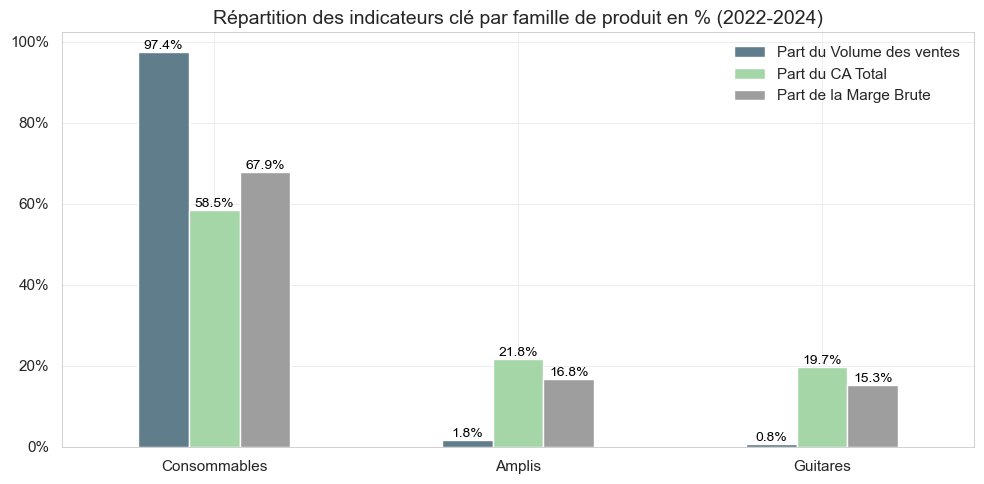

In [70]:
# --- Visualisation de la Contribution Relative des Familles de Produits ---

# Génération d'un graphique en barres groupées (kind='bar') pour comparer la contribution 
# des différentes familles de produits aux indicateurs financiers (Volume, CA, Marge).
ax = df_famille_produit.plot(kind='bar', figsize=(10, 5))

# Définition des étiquettes de légende explicites pour remplacer les noms de colonnes bruts.
# Ceci assure que le graphique est immédiatement compréhensible pour l'utilisateur final.
nouvelles_etiquettes = ['Part du Volume des ventes', 'Part du CA Total', 'Part de la Marge Brute'] 

# Application de la légende au graphique.
ax.legend(labels=nouvelles_etiquettes)

# Paramétrage du titre et des axes pour le contexte temporel de l'analyse.
plt.title('Répartition des indicateurs clé par famille de produit en % (2022-2024)', fontsize = 14)

# Récupération de l'objet Axes pour les ajustements de formatage.
ax = plt.gca()
# Suppression de l'étiquette de l'axe X (les noms des familles de produits étant auto-générés).
ax.set_xlabel('')
# Formatage de l'axe Y pour afficher les valeurs en pourcentage (%).
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,_: f"{y:.0f}%"))
# Rotation des étiquettes X à 0 degré pour maximiser la lisibilité horizontale des noms de familles.
ax.tick_params(axis='x', rotation=0)

# Ajout des annotations de données (étiquettes) au-dessus de chaque barre pour une lecture précise.
for container in ax.containers:
    # Itération sur chaque barre dans la série (Volume, CA, Marge)
    for bar in container: 
        height = bar.get_height()
        
        # Placement des annotations de texte pour chaque barre :
        ax.text(
            bar.get_x() + bar.get_width() / 2.,  # Position X : centre horizontal de la barre.
            height + 0.01,                       # Position Y : légèrement au-dessus de la barre (ajustement de 1%).
            f'{height:.1f}%',                    # Formatage des données : une décimale et le symbole "%".
            ha='center',                         # Alignement horizontal centré.
            va='bottom',                         # Alignement vertical pour placer le texte au-dessus de la barre.
            fontsize=10,
            color='black'
        )

# Ajustement automatique des paramètres du graphique pour s'assurer que tous les éléments (titres, étiquettes) sont visibles.
plt.tight_layout() 
plt.show()

## 2.b. Top catégories en CA (df_top_CA)

### Importation des données

In [90]:
df_top_CA = pd.read_csv(r"../1.Donnees\3.Exports_csv\3.analyse_produits\3.1.performances_produits\3.1.1.synthese_categorie.csv").copy()
df_top_CA

,categorie,total_transactions,volume_total_vendu,pct_volume_total,ca_total,pct_ca_global,marge_brute,pct_marge_globale
0,Ampli,5827,5827,1.77,1575038.0,21.75,630004.00,16.82
1,Sangle,28086,70063,21.26,1495266.0,20.65,897161.10,23.96
2,Cordes Folk,32683,81902,24.86,1103322.1,15.24,661967.00,17.68
3,Cordes Electrique,33702,84399,25.62,821485.4,11.34,492924.88,13.16
4,Mediator,33827,84669,25.70,818572.5,11.30,491130.12,13.12
5,Guitare Folk,1337,1337,0.41,769992.0,10.63,307996.38,8.23
6,Guitare Electrique,1291,1291,0.39,658177.0,9.09,263270.75,7.03


### Préparation des données

In [ ]:
# Le DataFrame original contient des valeurs absolues et des pourcentages. 
# L'étape suivante vise à isoler uniquement les colonnes de contribution en pourcentage du total global.

# Identification des colonnes en valeur absolue ou non pertinentes à l'aide de leur index positionnel.
indices_a_supprimer = [1, 2, 4, 6]

# Définition formelle de la liste des colonnes à supprimer en utilisant l'index.
colonnes_a_supprimer = df_top_CA.columns[indices_a_supprimer]

# Exécution de la suppression pour conserver uniquement les proportions (%) et la colonne 'categorie'.
df_top_CA_pct = df_top_CA.drop(columns=colonnes_a_supprimer)

# Définition de la colonne 'categorie' comme index du DataFrame.
df_top_CA_pct.set_index(['categorie'], inplace=True)

### Visualisation

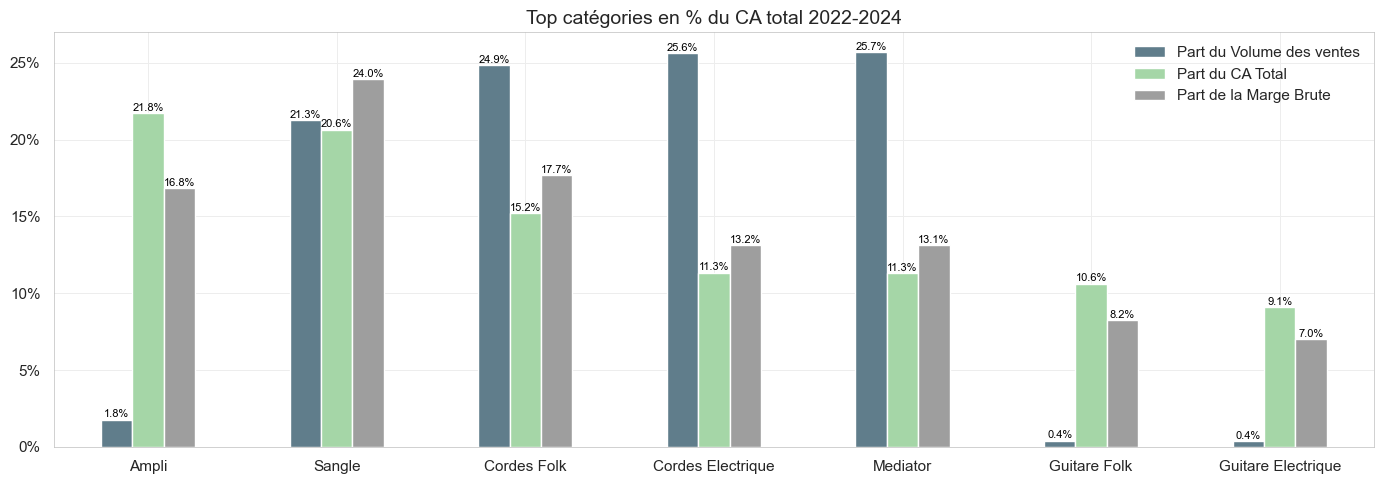

In [72]:
# --- Visualisation des indicateurs de contribution pour les catégories ---

# Génération d'un graphique en barres groupées (kind='bar') pour visualiser la contribution 
# des catégories au Volume, CA, et Marge. La grande taille (figsize=(14, 5)) est choisie 
# pour garantir la lisibilité des étiquettes et du titre sur l'axe X.
ax = df_top_CA_pct.plot(kind='bar', figsize=(14, 5))

# Mise à jour manuelle des étiquettes de la légende pour une interprétation immédiate des pourcentages.
nouvelles_etiquettes = ['Part du Volume des ventes', 'Part du CA Total', 'Part de la Marge Brute'] 
ax.legend(labels=nouvelles_etiquettes)

# Définition du titre du graphique pour spécifier le contexte temporel et l'indicateur principal (CA).
plt.title('Top catégories en % du CA total 2022-2024', fontsize = 14)

# Récupération de l'objet Axes pour les modifications de mise en forme.
ax = plt.gca()

# Suppression de l'étiquette de l'axe X pour éviter la redondance avec les étiquettes de catégorie.
ax.set_xlabel('')

# Formatage de l'axe Y pour afficher les valeurs avec le symbole pourcentage (%).
# Utilisation d'une fonction lambda avec FuncFormatter pour garantir une décimale entière.
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,_: f"{y:.0f}%"))
# Rotation à zéro degré des étiquettes X pour une lisibilité maximale des noms de catégories.
ax.tick_params(axis='x', rotation=0)

# Ajout des annotations de données (étiquettes) au-dessus de chaque barre :
for container in ax.containers: 
    # Itération sur chaque conteneur (série de données : Volume, CA, Marge)
    for bar in container: 
        height = bar.get_height()
        
        # Placement de l'annotation :
        ax.text(
            bar.get_x() + bar.get_width() / 2.,  # Position X : centre horizontal de la barre.
            height + 0.01,                       # Position Y : légèrement au-dessus de la barre (ajustement vertical de 1%).
            f'{height:.1f}%',                    # Formatage : une décimale et le symbole "%".
            ha='center',                         # Alignement horizontal centré.
            va='bottom',                         # Alignement vertical positionné sous la hauteur du texte.
            fontsize=8,
            color='black'
        )

# Ajustement des marges pour assurer que tous les éléments (annotations, titres) sont entièrement visibles.
plt.tight_layout() 
plt.show()

## 2.c. Analyse marge/volume en % cumulés (Pareto)

### Importation des données

In [91]:
df_pareto = pd.read_csv(r"../1.Donnees\3.Exports_csv\3.analyse_produits\3.1.performances_produits\3.1.3.synthese_reference_produit_global.csv").copy()
df_pareto

,categorie,reference_produit,total_transactions,volume_total_vendu,pct_volume_total,ca_total,pct_ca_global,marge_brute,pct_marge_globale
0,Ampli,Fender Blues Junior,324,324,0.10,249156.0,3.44,99662.516,2.66
1,Sangle,Sangle cuir Deluxe,2206,5470,1.66,246150.0,3.40,147690.000,3.94
2,Ampli,Vox AC30,182,182,0.06,218400.0,3.02,87360.000,2.33
3,Sangle,Sangle Cuir Suede,2248,5603,1.70,196105.0,2.71,117663.000,3.14
4,Ampli,Boss Katana 50 (Gen 3),682,682,0.21,194370.0,2.68,77748.000,2.08
...,...,...,...,...,...,...,...,...,...
65,Cordes Electrique,Ernie Ball Super Slinky 2223,3201,7966,2.42,45406.2,0.63,27243.406,0.73
66,Ampli,Blackstar FLY3 Mini,619,619,0.19,43330.0,0.60,17332.000,0.46
67,Guitare Folk,Takamine GD20,102,102,0.03,41820.0,0.58,16728.000,0.45
68,Mediator,Gibson Perloid Picks Medium 12pc,3264,8171,2.48,40037.9,0.55,24022.643,0.64


### Préparation des données

In [ ]:
# --- Préparation du DataFrame pour le Calcul de la Contribution Cumulative ---

# Nettoyage des colonnes : Suppression des indicateurs en valeur absolue (transactions, CA, volume)
# et de la contribution CA (pct_ca_global) pour isoler la Marge Brute, l'indicateur d'intérêt pour Pareto.
df_pareto = df_pareto.drop(columns=['total_transactions', 'ca_total', 'pct_ca_global', 'volume_total_vendu'])

# Tri du DataFrame par ordre décroissant de la Marge Brute (pct_marge_globale).
# Cette étape est fondamentale pour le calcul correct de la contribution cumulative.
df_pareto.sort_values(by='pct_marge_globale', ascending=False, inplace=True)

# --- Agrégation au Niveau Catégorie ---

# Agrégation des marges brutes par catégorie pour obtenir la marge totale par groupe.
df_marge_categorie = df_pareto.groupby('categorie')['marge_brute'].sum().reset_index()

# Calcul de la Marge Brute Totale (global) pour l'ensemble du catalogue.
total_marge = df_pareto['marge_brute'].sum()

# Calcul de la contribution en pourcentage de chaque catégorie à la Marge Globale.
df_marge_categorie['pct_marge_globale'] = df_marge_categorie['marge_brute'] / total_marge

# Retri du DataFrame agrégé par ordre décroissant de la contribution (%) pour la visualisation.
df_marge_categorie = df_marge_categorie.sort_values(by='pct_marge_globale', ascending=False)

# --- Calcul de la Somme Cumulative (Courbe de Pareto) ---

# Calcul de la somme cumulative de la contribution en pourcentage de la marge globale.
df_marge_categorie['cumul_marge_pct'] = df_marge_categorie['pct_marge_globale'].cumsum()

### Visualisation

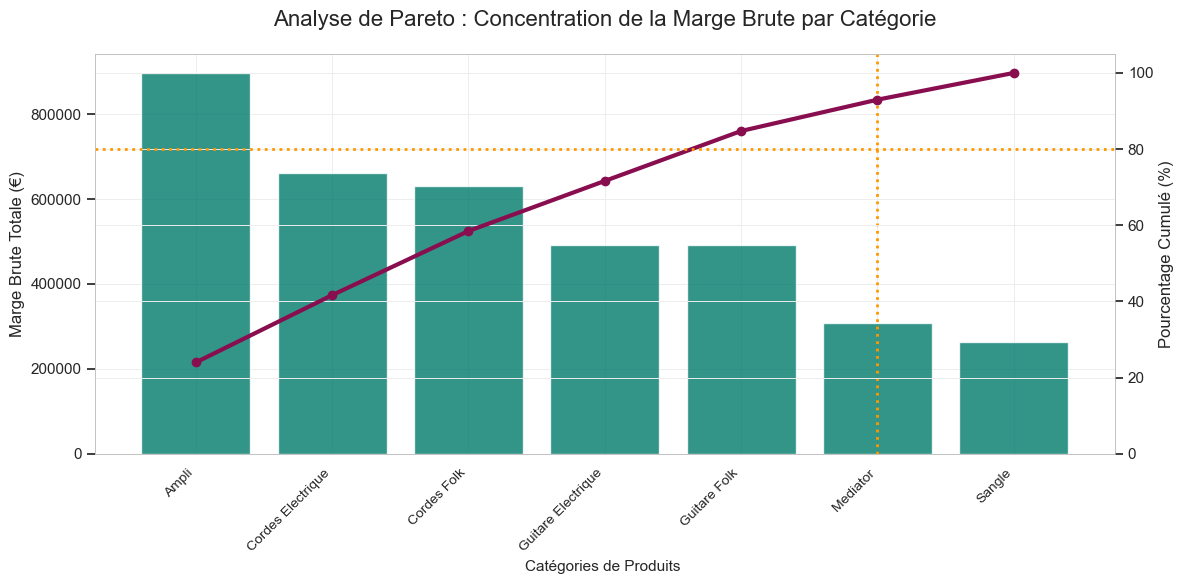

In [ ]:
# --- Définition des Palettes de Couleurs pour la Visualisation ---
MINI_BLUE = '#607D8B' # Bleu Ardoise (Utilisé pour la Courbe de Cumul et ses repères)
MINI_GREEN = '#A5D6A7' # Vert Sauge Clair (Utilisé pour les Barres de Marge Brute)
MINI_GRAY = '#9E9E9E' # Gris (Utilisé pour la ligne de référence horizontale)

# Initialisation de la figure et du double-axe pour le graphique combiné (Pareto Chart)
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Tracé des Barres de Marge Brute (Axe Y Gauche - Axe Primaire) ---
ax1.bar(
    df_marge_categorie['categorie'], 
    df_marge_categorie['marge_brute'], 
    color=BLEU_CANARD, 
    alpha=0.8, 
    label='Marge Brute (€)'
)
# Formatage de l'axe Y primaire (Marge Brute en Euros)
ax1.set_ylabel('Marge Brute Totale (€)', fontsize=12)
ax1.tick_params(axis='y')

# --- Tracé de la Courbe de Pareto (Axe Y Droit - Axe Secondaire) ---
# Création du deuxième axe des ordonnées (Y) partageant le même axe X (twinx).
ax2 = ax1.twinx()
ax2.plot(
    df_marge_categorie['categorie'], 
    df_marge_categorie['cumul_marge_pct'] * 100, # Mise à l'échelle en pourcentage 
    color=WINE, 
    marker='o', 
    linestyle='-', 
    linewidth=3,
    label='Marge Cumulée (%)'
)

# Formatage de l'axe Y secondaire (Pourcentage Cumulé)
ax2.set_ylabel('Pourcentage Cumulé (%)', fontsize=12)
ax2.tick_params(axis='y')
# Définition des limites Y de 0 à 105% pour une meilleure visualisation de la courbe.
ax2.set_ylim(0, 105)

# --- Ajout des Lignes de Référence (Loi 80/20) ---
# Ligne horizontale de référence à 80% (cible de la règle de Pareto).
ax2.axhline(80, color=MANDARINE, linestyle=':', linewidth=2) 

# Identification de l'index de la catégorie atteignant ou dépassant 80% de la marge cumulative.
index_80_percent = df_marge_categorie[df_marge_categorie['cumul_marge_pct'] >= 0.8].index[0]
# Ligne verticale de référence pour marquer la catégorie pivot (le point 80/20).
ax1.axvline(index_80_percent, color=MANDARINE, linestyle=':', linewidth=2) 

# --- Configuration de l'Axe X ---
# Définition des positions et des étiquettes X basées sur l'index des catégories.
xticks_positions = df_marge_categorie.index 
xticks_labels = df_marge_categorie['categorie'] 
ax1.set_xticks(xticks_positions)
# Rotation des étiquettes X de 45 degrés pour éviter le chevauchement des noms de catégories.
ax1.set_xticklabels(xticks_labels, rotation=45, ha='right', fontsize=10) 
ax1.set_xlabel('Catégories de Produits ', fontsize=11)

# --- Titre et Affichage ---
plt.title('Analyse de Pareto : Concentration de la Marge Brute par Catégorie', fontsize=16, pad=20)
# Ajustement des marges pour un rendu propre.
fig.tight_layout()

plt.show()